In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
from sklearn.model_selection import train_test_split
import tensorflow as tf
import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

import pathlib
AUTOTUNE = tf.data.experimental.AUTOTUNE

In [2]:
tf.__version__

'2.0.0'

In [3]:
datadir = "./dataset"
datadir = pathlib.Path(datadir)
classname = np.array([item.name for item in datadir.glob('*') if item.name != "LICENSE.txt"])
label = list(classname)
# label

In [4]:
# picachu = list(datadir.glob('Pichu/*'))
# picachu

In [5]:
BATCH_SIZE =32
IMG_HEIGHT = 224
IMG_WIDTH = 224
epoch = np.ceil(1000/BATCH_SIZE)

In [6]:
image_preprocess = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
train_data = image_preprocess.flow_from_directory(directory = str(datadir), batch_size = BATCH_SIZE, target_size = (IMG_WIDTH, IMG_HEIGHT), classes = label)

Found 24646 images belonging to 928 classes.


In [7]:
image, label = next(train_data)
# image
# for image_path in picachu[:3]:
#     display.display(Image.open(str(image_path)))

In [8]:
# label

In [15]:
X_train, X_test, y_train, y_test = train_test_split(image, label, test_size = 0.3, random_state = 42)
y_train.shape[1]

928

In [20]:

X_train.shape[1]

224

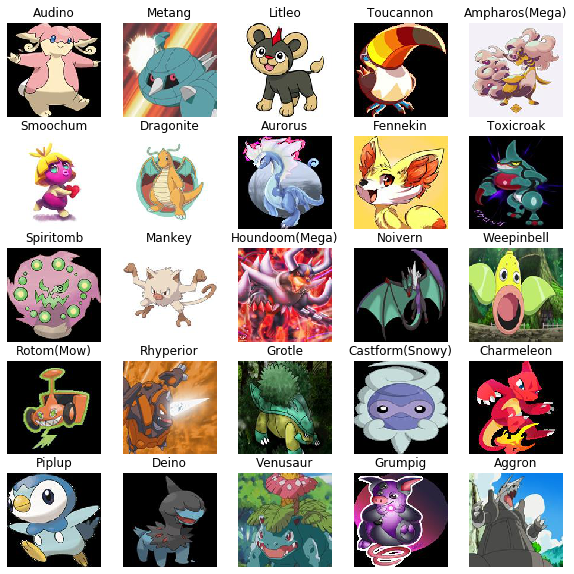

In [21]:
# uncommend this columns if you want see the sample
def show_batch(image_batch, label_batch):
    plt.figure(figsize = (10,10))
    for n in range(25):
        ax = plt.subplot(5,5,n+1)
        plt.imshow(image_batch[n])
        plt.title(classname[label_batch[n]==1][0].title())
        
        plt.axis('off')
image_batch, label_batch = next(train_data)
show_batch(image_batch, label_batch)